In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []
test_labels = []
test_samples = []

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)


for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [6]:
print(train_labels[:5])
print(train_samples[:5])
print(test_labels[:5])
print(test_samples[:5])

[0 0 0 0 0]
[27 54 40 64 30]
[0 0 0 1 0]
[28 37 13 92 49]


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [8]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [9]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [12]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=30, verbose=2, shuffle=True)


Epoch 1/30
210/210 - 3s - loss: 0.5314 - accuracy: 0.7252 - 3s/epoch - 15ms/step
Epoch 2/30
210/210 - 1s - loss: 0.3281 - accuracy: 0.9081 - 650ms/epoch - 3ms/step
Epoch 3/30
210/210 - 1s - loss: 0.2720 - accuracy: 0.9367 - 511ms/epoch - 2ms/step
Epoch 4/30
210/210 - 1s - loss: 0.2581 - accuracy: 0.9362 - 697ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.2528 - accuracy: 0.9400 - 705ms/epoch - 3ms/step
Epoch 6/30
210/210 - 1s - loss: 0.2493 - accuracy: 0.9429 - 752ms/epoch - 4ms/step
Epoch 7/30
210/210 - 1s - loss: 0.2463 - accuracy: 0.9457 - 736ms/epoch - 4ms/step
Epoch 8/30
210/210 - 1s - loss: 0.2440 - accuracy: 0.9433 - 647ms/epoch - 3ms/step
Epoch 9/30
210/210 - 1s - loss: 0.2434 - accuracy: 0.9467 - 853ms/epoch - 4ms/step
Epoch 10/30
210/210 - 1s - loss: 0.2415 - accuracy: 0.9457 - 635ms/epoch - 3ms/step
Epoch 11/30
210/210 - 1s - loss: 0.2405 - accuracy: 0.9471 - 616ms/epoch - 3ms/step
Epoch 12/30
210/210 - 1s - loss: 0.2392 - accuracy: 0.9414 - 748ms/epoch - 4ms/step
Epo

In [13]:
model.evaluate(scaled_test_samples, test_labels, verbose=2)

14/14 - 0s - loss: 0.2224 - accuracy: 0.9476 - 330ms/epoch - 24ms/step


[0.22244098782539368, 0.9476190209388733]

In [14]:
model_predictions = model.predict(scaled_test_samples, batch_size=10, verbose=2)
model_predictions[:5]

42/42 - 0s - 138ms/epoch - 3ms/step


array([[0.95761526, 0.04238474],
       [0.95709854, 0.04290144],
       [0.9584632 , 0.04153676],
       [0.02996374, 0.97003627],
       [0.9562385 , 0.04376151]], dtype=float32)

In [15]:
rounded_model_predictions = np.argmax(model_predictions, axis=1)

In [16]:
rounded_model_predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [17]:
rounded_model_predictions[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [18]:
test_labels[:5]

array([0, 0, 0, 1, 0])

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(test_labels, rounded_model_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       210
           1       0.95      0.94      0.95       210

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



In [21]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [22]:
print(classification_report(test_labels, rounded_model_predictions))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       210
           1       0.95      0.94      0.95       210

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [24]:
cm = confusion_matrix(test_labels, rounded_model_predictions)


In [25]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']

Confusion matrix, without normalization
[[200  10]
 [ 12 198]]


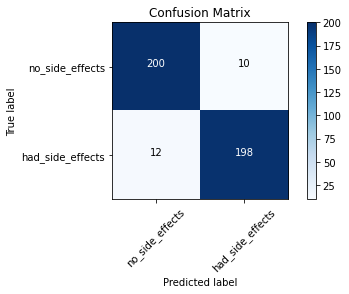

In [26]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Save model and weights

In [27]:
import os.path
if os.path.isfile('d:/jupyter/tensorflow/DL/savedmodel/medical_trial_model2.h5') is False:
    model.save('d:/jupyter/tensorflow/DL/savedmodel/medical_trial_model2.h5')
